In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
import numpy as np

from selection_methods import SelectionMethod

In [3]:
vapeplot.set_palette('cool')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [4]:
path_data = "../../results_explored_by_task/antiviral/"
list_documents = os.listdir(path_data)
len(list_documents)

24

In [5]:
list_df = []

for encoder in list_documents:
    list_explored = os.listdir(f"{path_data}{encoder}")
    for element in list_explored:

        df_data = pd.read_csv(f"{path_data}{encoder}/{element}")
        df_data['encoder'] = encoder
        list_df.append(df_data)
df_results = pd.concat(list_df, axis=0)
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder
0,KNeighbors,0.547009,0.525925,0.570676,0.547009,0.124114,0.003062,0.021666,0.518381,0.542189,0.553317,0.542189,5719,Group_4
1,DecisionTree,0.639316,0.639365,0.641392,0.639316,0.280604,0.018790,0.004879,0.646573,0.647142,0.648298,0.647142,5719,Group_4
2,Bagging,0.697436,0.697361,0.697324,0.697436,0.393519,0.119267,0.006299,0.699310,0.700703,0.704007,0.700703,5719,Group_4
3,RandomForest,0.726496,0.726616,0.727160,0.726496,0.453057,0.228086,0.014960,0.711483,0.711692,0.712512,0.711692,5719,Group_4
4,ExtraTrees,0.690598,0.690360,0.694535,0.690598,0.385491,0.201398,0.017142,0.707193,0.708026,0.710877,0.708026,5719,Group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.807114,0.805995,0.814191,0.807114,0.621224,37.499843,0.010652,0.797100,0.798240,0.805049,0.798240,9893,prottrans_uniref
7,Hist Gradient Boosting,0.818057,0.816844,0.826530,0.818057,0.644490,12.688205,0.017329,0.805677,0.807038,0.816174,0.807038,9893,prottrans_uniref
8,SVC,0.514364,0.487444,0.517776,0.514364,0.031616,1.458076,0.584312,0.459206,0.485044,0.484755,0.485044,9893,prottrans_uniref
9,Gaussian Process,0.544460,0.544424,0.544488,0.544460,0.088958,6.217992,0.270608,0.565259,0.565982,0.566460,0.565982,9893,prottrans_uniref


In [6]:
df_results["overffiting_accuracy"] = df_results["validation_accuracy"]/df_results["train_accuracy"]
df_results["overffiting_f1"] = df_results["validation_f1_score"]/df_results["train_f1_weighted"]
df_results["overffiting_precision"] = df_results["validation_precision"]/df_results["train_precision_weighted"]
df_results["overffiting_recall"] = df_results["validation_recall"]/df_results["train_recall_weighted"]
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder,overffiting_accuracy,overffiting_f1,overffiting_precision,overffiting_recall
0,KNeighbors,0.547009,0.525925,0.570676,0.547009,0.124114,0.003062,0.021666,0.518381,0.542189,0.553317,0.542189,5719,Group_4,1.008889,1.014553,1.031373,1.008889
1,DecisionTree,0.639316,0.639365,0.641392,0.639316,0.280604,0.018790,0.004879,0.646573,0.647142,0.648298,0.647142,5719,Group_4,0.987907,0.988851,0.989347,0.987907
2,Bagging,0.697436,0.697361,0.697324,0.697436,0.393519,0.119267,0.006299,0.699310,0.700703,0.704007,0.700703,5719,Group_4,0.995337,0.997213,0.990507,0.995337
3,RandomForest,0.726496,0.726616,0.727160,0.726496,0.453057,0.228086,0.014960,0.711483,0.711692,0.712512,0.711692,5719,Group_4,1.020801,1.021270,1.020558,1.020801
4,ExtraTrees,0.690598,0.690360,0.694535,0.690598,0.385491,0.201398,0.017142,0.707193,0.708026,0.710877,0.708026,5719,Group_4,0.975385,0.976197,0.977011,0.975385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.807114,0.805995,0.814191,0.807114,0.621224,37.499843,0.010652,0.797100,0.798240,0.805049,0.798240,9893,prottrans_uniref,1.011116,1.011159,1.011357,1.011116
7,Hist Gradient Boosting,0.818057,0.816844,0.826530,0.818057,0.644490,12.688205,0.017329,0.805677,0.807038,0.816174,0.807038,9893,prottrans_uniref,1.013654,1.013860,1.012688,1.013654
8,SVC,0.514364,0.487444,0.517776,0.514364,0.031616,1.458076,0.584312,0.459206,0.485044,0.484755,0.485044,9893,prottrans_uniref,1.060448,1.061493,1.068118,1.060448
9,Gaussian Process,0.544460,0.544424,0.544488,0.544460,0.088958,6.217992,0.270608,0.565259,0.565982,0.566460,0.565982,9893,prottrans_uniref,0.961973,0.963141,0.961211,0.961973


In [7]:
df_results_train = df_results[['description', 'train_f1_weighted',
            'train_recall_weighted', 'train_precision_weighted', 'train_accuracy',
            'iteration', 'encoder']]

df_results_train.columns = ["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]
df_results_train['Stage'] = "Training"

df_results_validation = df_results[['description', 'validation_accuracy', 'validation_f1_score', 'validation_precision',
    'validation_recall', 'validation_mcc', 'iteration', 'encoder']]

df_results_validation.columns = ["Algorithm", "Accuracy", "F1", "Precision", "Recall", "MCC", "Iteration", "Encoder"]
df_results_validation['Stage'] = "Validating"

df_concat = pd.concat([df_results_train, df_results_validation], axis=0)

df_concat["Task"] = "Antiviral"

df_concat.to_csv("../../results_explored_by_task/summary_models_explored/antiviral_explored.csv", index=False)

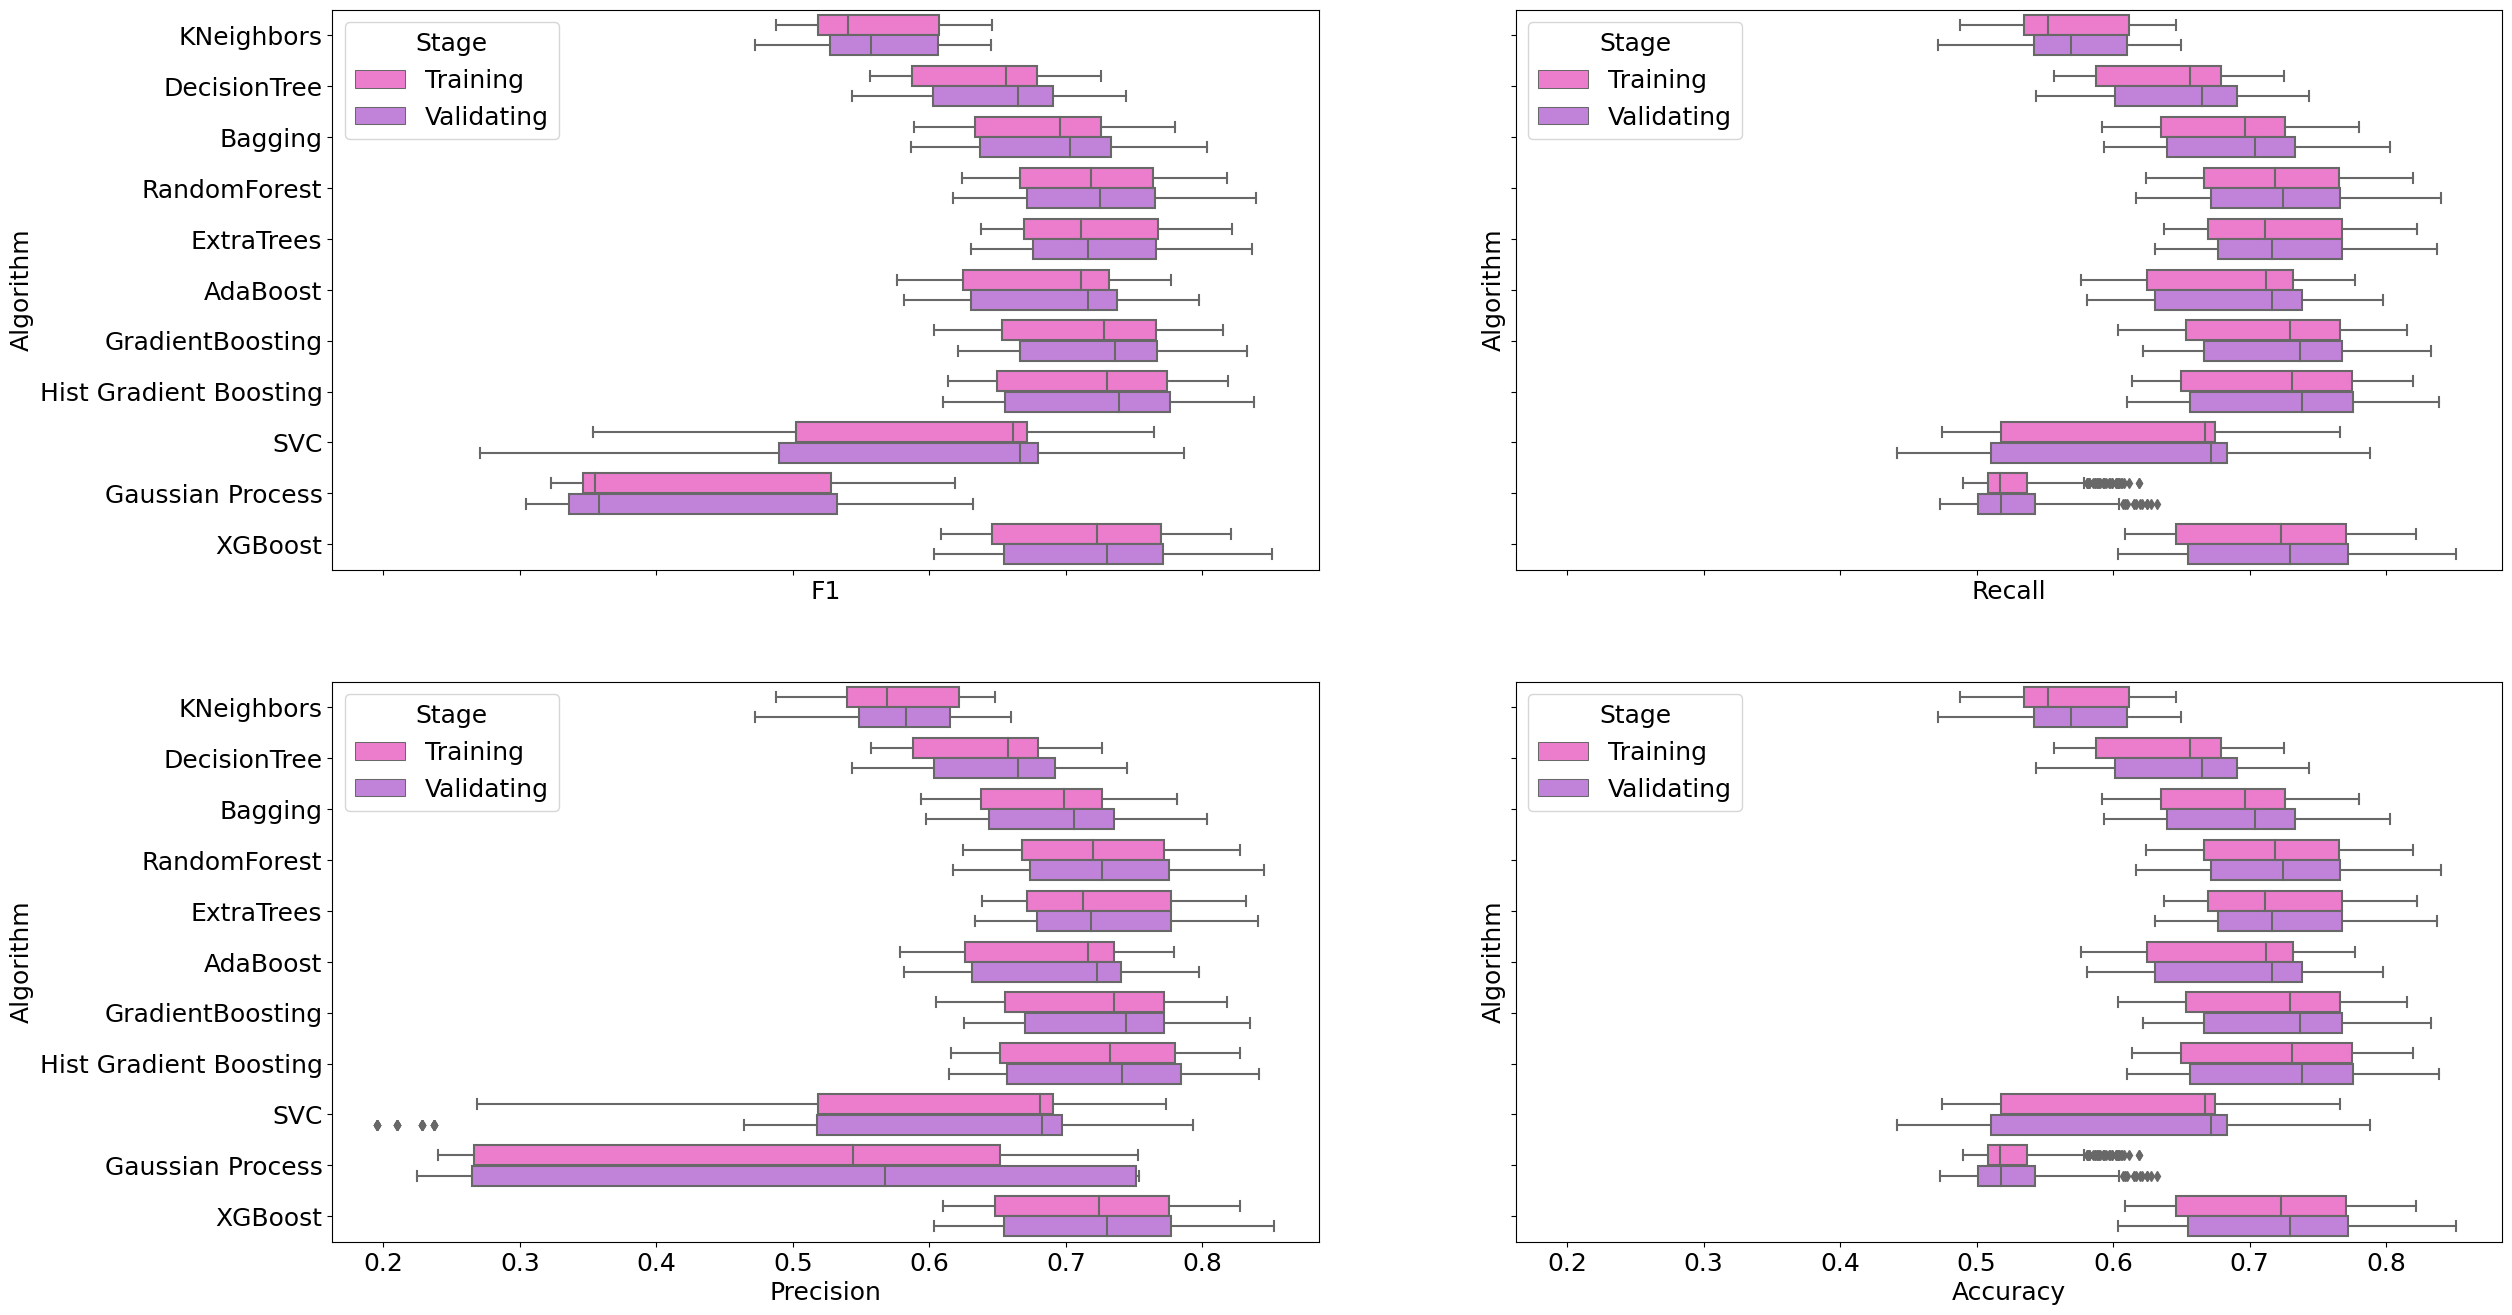

In [15]:
fig, axes = plt.subplots(2,2, figsize=(28,16), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Algorithm")
ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Algorithm")
ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Algorithm")
ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Algorithm")

plt.savefig("../../results_explored_by_task/summary_models_explored/antiviral/algorithm_distribution.png")

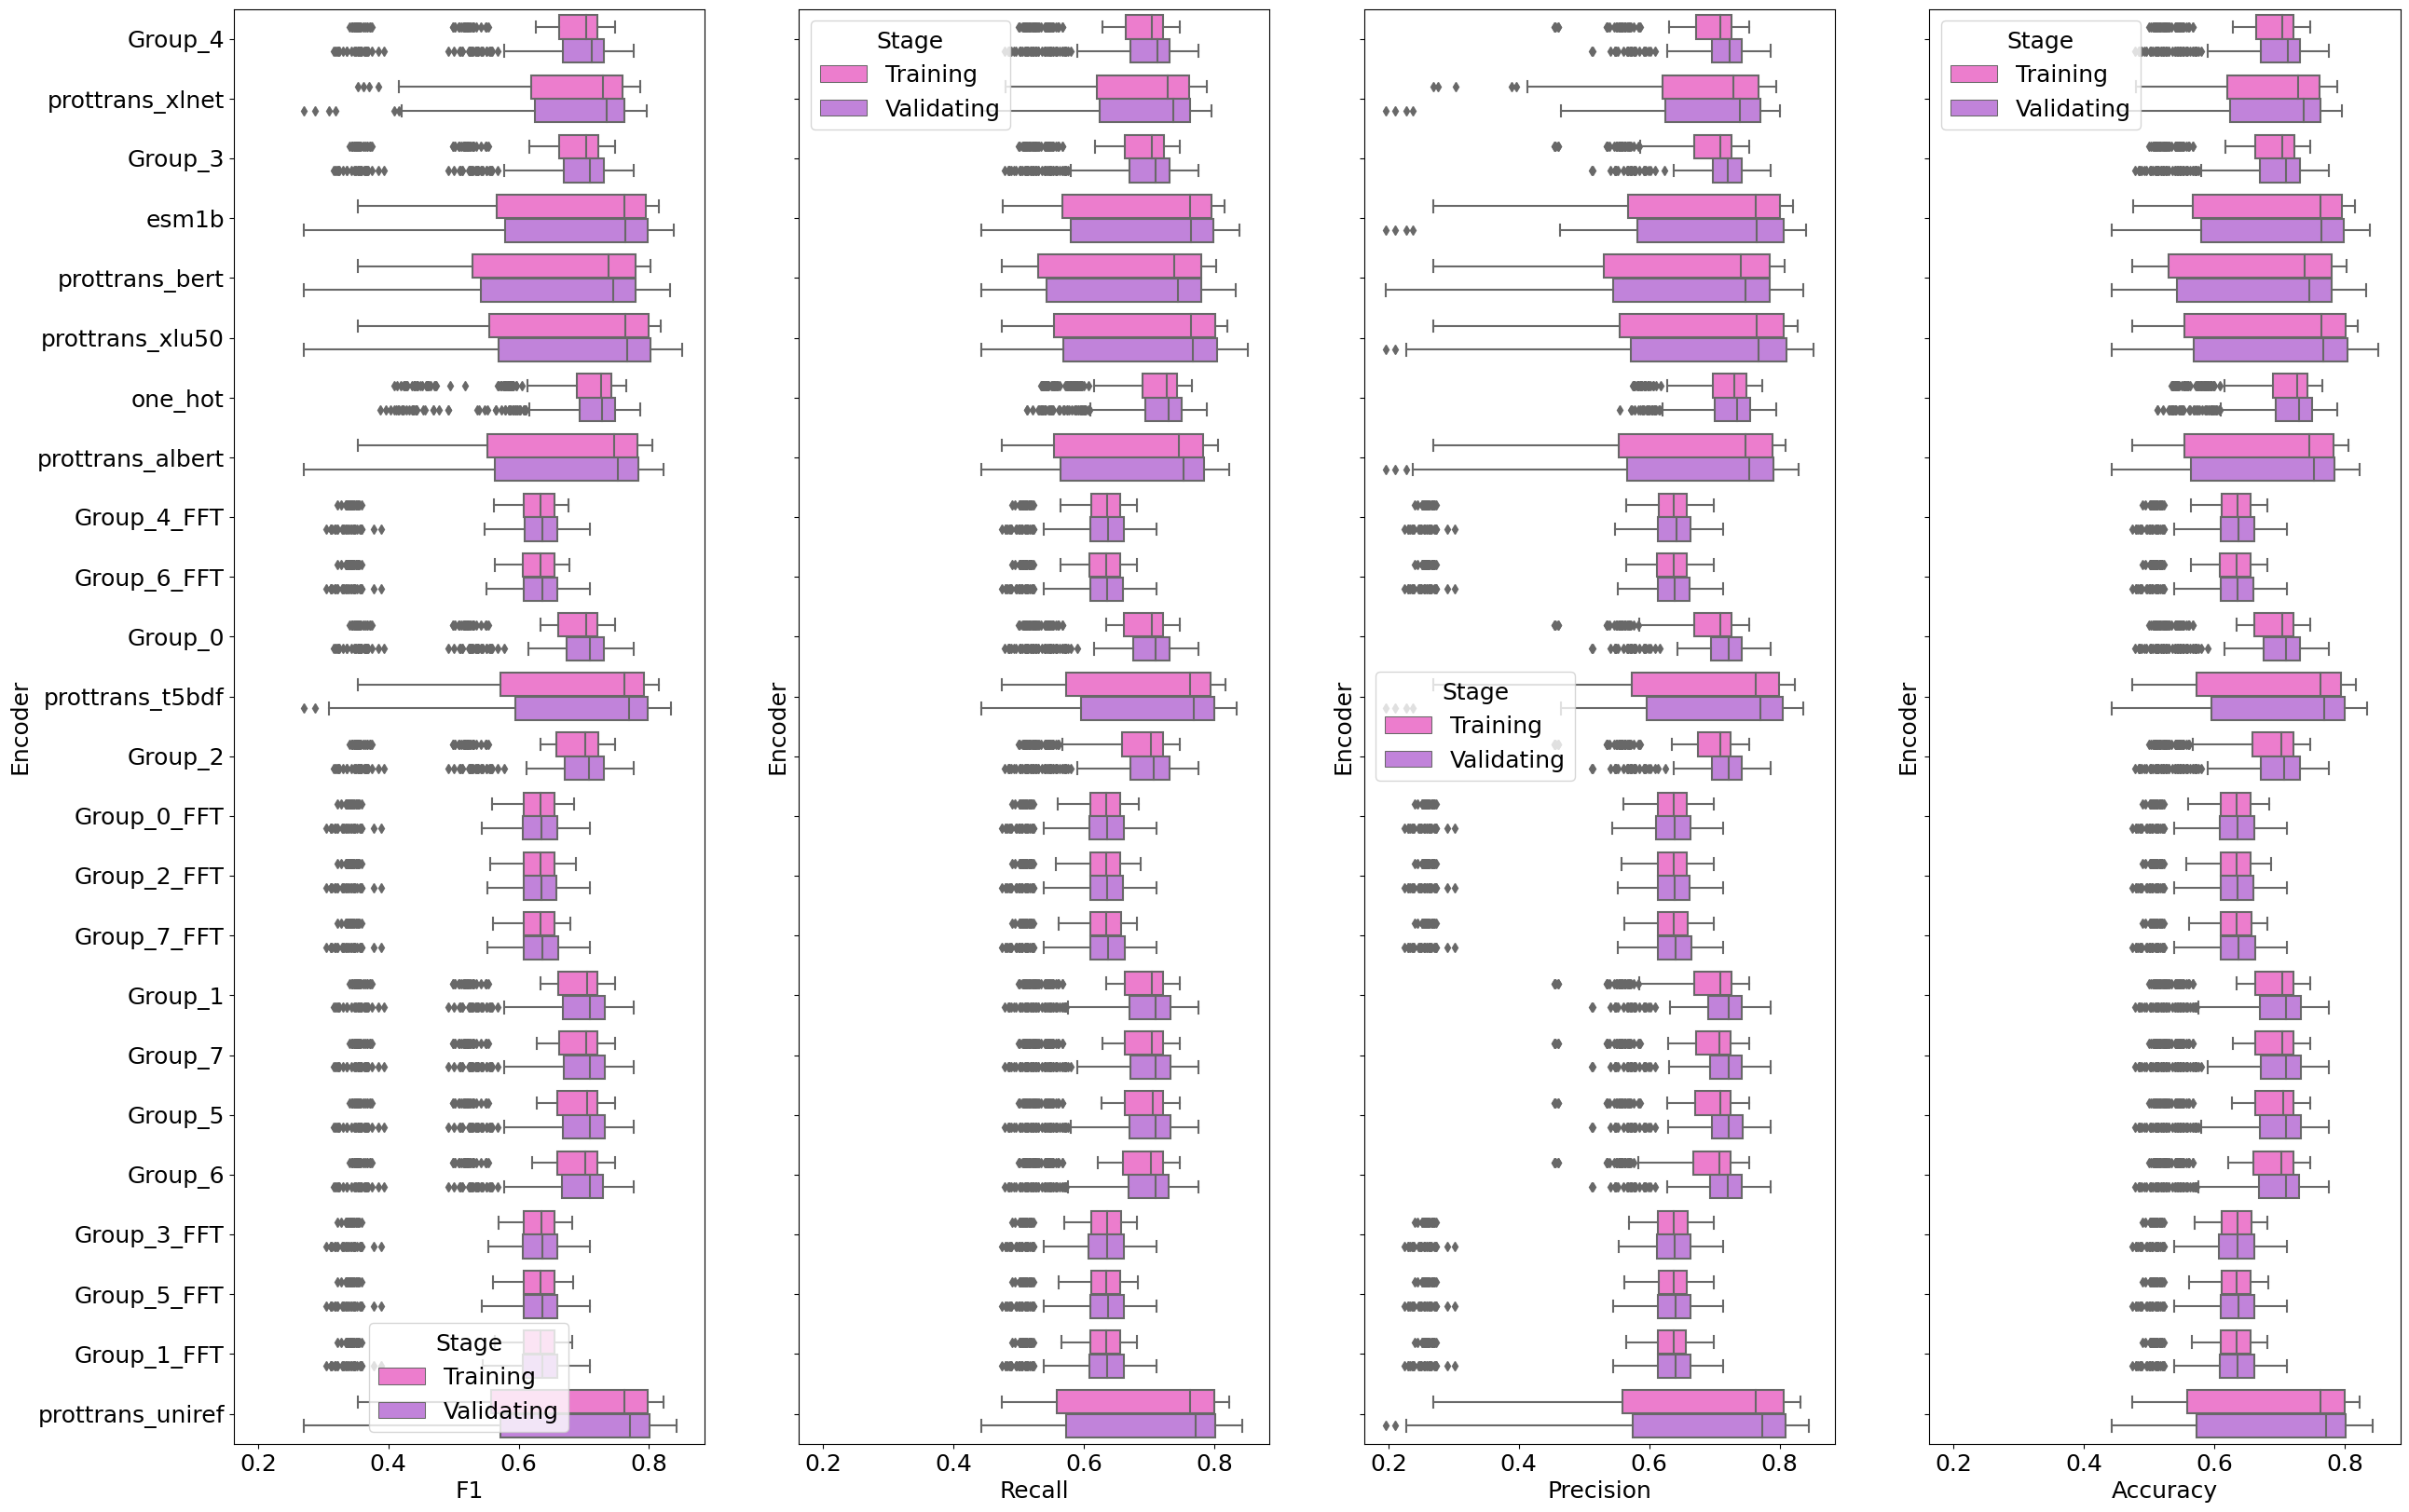

In [13]:
fig, axes = plt.subplots(1,4, figsize=(30,20), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0], data=df_concat, x="F1", hue="Stage", y="Encoder")
ax2 = sns.boxplot(ax=axes[1], data=df_concat, x="Recall", hue="Stage", y="Encoder")
ax3 = sns.boxplot(ax=axes[2], data=df_concat, x="Precision", hue="Stage", y="Encoder")
ax4 = sns.boxplot(ax=axes[3], data=df_concat, x="Accuracy", hue="Stage", y="Encoder")

plt.savefig("../../results_explored_by_task/summary_models_explored/antiviral/encoder_distribution.png")

In [12]:
selection_instance = SelectionMethod()
df_selection = selection_instance.select(13, df_results_train, df_results_validation)
df_selection.to_csv("../../results_explored_by_task/summary_models_explored/antiviral/selected_combinations.csv", index=False)

df_selection

,Algorithm,Encoder,mean_accuracy_training_x,mean_f_score_training_x,mean_precision_training_x,mean_recall_training_x,mean_accuracy_testing_x,mean_f_score_testing_x,mean_precision_testing_x,mean_recall_testing_x,mean_accuracy_testing_y,mean_f_score_testing_y,mean_precision_testing_y,mean_recall_testing_y,mean_accuracy_training_y,mean_f_score_training_y,mean_precision_training_y,mean_recall_training_y,Voting
92,ExtraTrees,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,14
163,Hist Gradient Boosting,prottrans_bert,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,14


In [11]:
df_results_validation[(df_results_validation["Algorithm"] == "ExtraTrees") & (df_results_validation["Encoder"] == "prottrans_t5bdf")].describe()

,Accuracy,F1,Precision,Recall,MCC,Iteration
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.797264,0.796317,0.803350,0.797264,0.600202,4593.233333
std,0.012754,0.012941,0.012214,0.012754,0.024508,2870.237809
min,0.777018,0.774984,0.778009,0.777018,0.554524,339.000000
25%,0.787962,0.786580,0.795262,0.787962,0.586798,1926.000000
50%,0.798906,0.797675,0.803592,0.798906,0.602825,4388.000000
75%,0.805746,0.805048,0.812871,0.805746,0.618334,6706.750000
max,0.822161,0.821858,0.823646,0.822161,0.645596,9893.000000
